# Pace: Plan

### Import Packages

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [131]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [132]:
!kaggle datasets download -d samithsachidanandan/average-monthly-surface-temperature-1940-2024

!unzip "average-monthly-surface-temperature-1940-2024.zip"

Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/average-monthly-surface-temperature-1940-2024
License(s): CC0-1.0
  0% 0.00/1.58M [00:00<?, ?B/s]
100% 1.58M/1.58M [00:00<00:00, 139MB/s]
Archive:  average-monthly-surface-temperature-1940-2024.zip
replace average-monthly-surface-temperature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [181]:
df = pd.read_csv("/content/average-monthly-surface-temperature.csv")
df.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


### Data Exploration

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Entity                         198900 non-null  object 
 1   Code                           198900 non-null  object 
 2   year                           198900 non-null  int64  
 3   Day                            198900 non-null  object 
 4   Average surface temperature    198900 non-null  float64
 5   Average surface temperature.1  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


In [183]:
df.describe()

,year,Average surface temperature,Average surface temperature.1
count,198900.00000,198900.000000,198900.000000
mean,1982.00000,18.072073,18.072073
std,24.53575,10.246142,8.710114
min,1940.00000,-36.240032,-21.529121
25%,1961.00000,12.304079,10.569263
50%,1982.00000,22.055794,21.856285
75%,2003.00000,25.317015,25.142885
max,2024.00000,39.889374,29.794220


In [136]:
df.isnull().sum()

,0
Entity,0
Code,0
year,0
Day,0
Average surface temperature,0
Average surface temperature.1,0


In [137]:
df.duplicated().sum()

0

In [138]:
df.dtypes

,0
Entity,object
Code,object
year,int64
Day,object
Average surface temperature,float64
Average surface temperature.1,float64


### Rename columns and converting date
We need to convert day to day, month, year columns

In [139]:
df["day"] = pd.to_datetime(df["Day"]).dt.day
df["month"] = pd.to_datetime(df["Day"]).dt.month_name()
df["year"] = pd.to_datetime(df["Day"]).dt.year
df.drop("Day", inplace=True, axis=1)
df.head(5)

,Entity,Code,year,Average surface temperature,Average surface temperature.1,day,month
0,Afghanistan,AFG,1940,-2.032494,11.327695,15,January
1,Afghanistan,AFG,1940,-0.733503,11.327695,15,February
2,Afghanistan,AFG,1940,1.999134,11.327695,15,March
3,Afghanistan,AFG,1940,10.199754,11.327695,15,April
4,Afghanistan,AFG,1940,17.942135,11.327695,15,May


In [140]:
df.rename(columns={"Average surface temperature": "temperature",
                   "Average surface temperature.1": "avg_temperature"}, inplace=True)
df.dtypes

,0
Entity,object
Code,object
year,int32
temperature,float64
avg_temperature,float64
day,int32
month,object


# pAce: Analyz

## Exploratory Data Analysis (EDA)

In [141]:
df1 = df.copy()

In [142]:
avg_temperature_by_year = df1.groupby("year")["temperature"].mean()

Text(0, 0.5, 'Temperature')

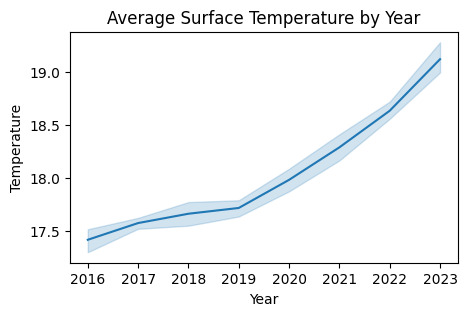

In [144]:
plt.figure(figsize=(5, 3))
sns.lineplot(x = df1.year, y = avg_temperature_by_year)
plt.title("Average Surface Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature")

Ortalama sıcaklığın her geçen yıl daha fazla arttığını, bunun başlıca sebebi küresel ısınma olabilir.

In [145]:
df1.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 

In [146]:
df1[df1["Entity"] == "World"].groupby(["day","month", "year"])["temperature"].mean().head()

day  month  year
15   April  1940    13.756892
            1941    13.554913
            1942    13.558277
            1943    13.589498
            1944    13.731234
Name: temperature, dtype: float64

In [147]:
df1[ ~(df1["Entity"] == "World")].groupby(["day","month", "year"])["temperature"].mean().head()

day  month  year
15   April  1940    17.567690
            1941    17.794825
            1942    17.763042
            1943    17.553124
            1944    17.862878
Name: temperature, dtype: float64

Dünya olarak girilen veriler ile kalan diğer ülkelerin ortalama sıcaklıklarını karşılaştırdığımızda farklı sonuçlar elde ediliyor. Buradan bu verinin bütün ülkeleri içermediğini fakat world olarak etiketlenen verilerde bütün dünyanın göz önünde bulundurulduğu düşünülebilir.

Bütün veriler ayın ortası olan 15. günde toplanmış.


In [148]:
df_world = df1[df1["Entity"] == "World"]
df_filtered = df1[~(df1["Entity"] == "World")]

In [149]:
country_avg_temp = df_filtered.groupby("Entity")["temperature"].mean().sort_values(ascending=False).reset_index()
hottest_countries = country_avg_temp.head().Entity.to_list()[:5]
coldest_countries = country_avg_temp.tail().Entity.to_list()[::-1]
print("Countries with the hottest average temperature:")
print(hottest_countries)
print("\nCountries with the coldest average temperature:")
print(coldest_countries)

Countries with the hottest average temperature:
['Senegal', 'Burkina Faso', 'Mali', 'Djibouti', 'Oman']

Countries with the coldest average temperature:
['Greenland', 'Canada', 'Russia', 'South Georgia and the South Sandwich Islands', 'Tajikistan']


## Data visualizations

<ipython-input-150-d14145667d6a>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


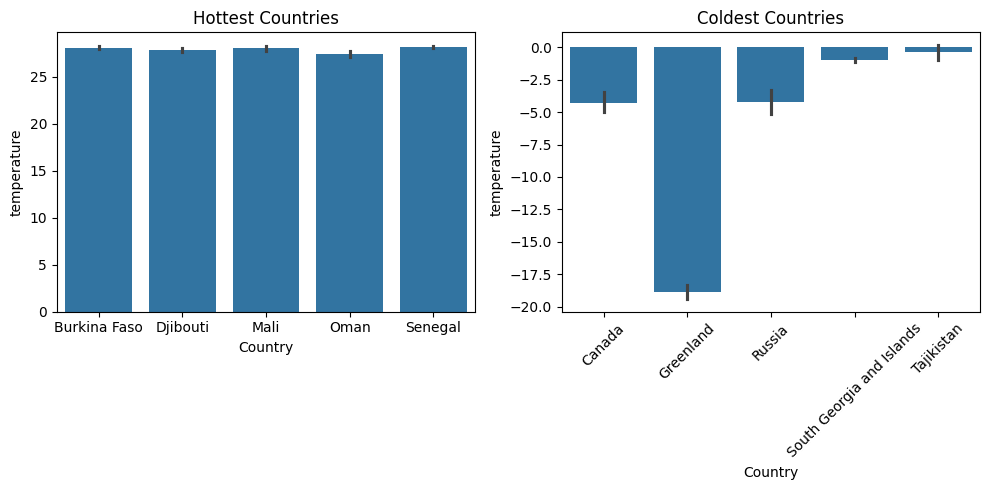

In [150]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.barplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(hottest_countries)], ax=ax[0])
ax[0].set_title("Hottest Countries")
ax[0].set_xlabel("Country")
sns.barplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(coldest_countries)], ax=ax[1])
ax[1].set_title("Coldest Countries")
ax[1].set_xlabel("Country")
ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Yorumla

<ipython-input-151-32f267e57c61>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


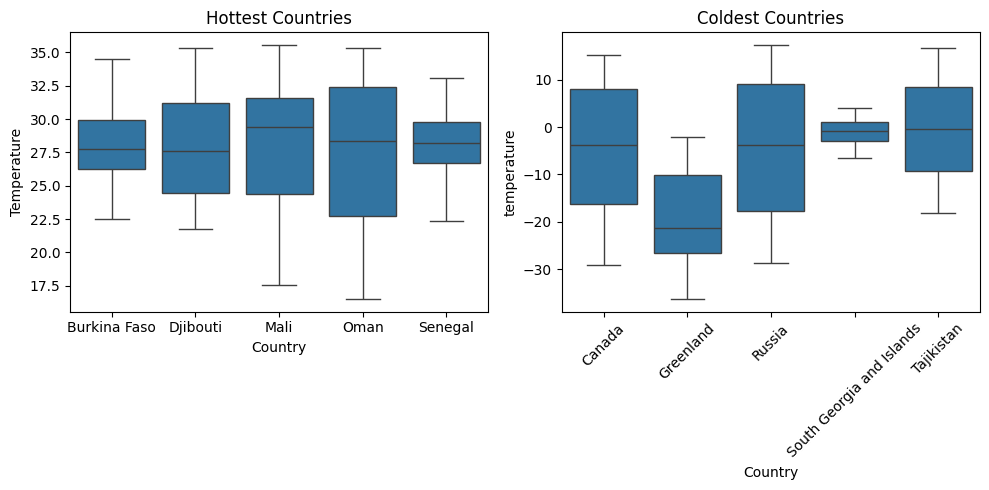

In [151]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(hottest_countries)], ax=ax[0])
ax[0].set_title("Hottest Countries")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Temperature")
sns.boxplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(coldest_countries)], ax=ax[1])
ax[1].set_title("Coldest Countries")
ax[1].set_xlabel("Country")
ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Yorumla

In [152]:
monthly_avg_temp = df_filtered.groupby("month")["temperature"].mean()

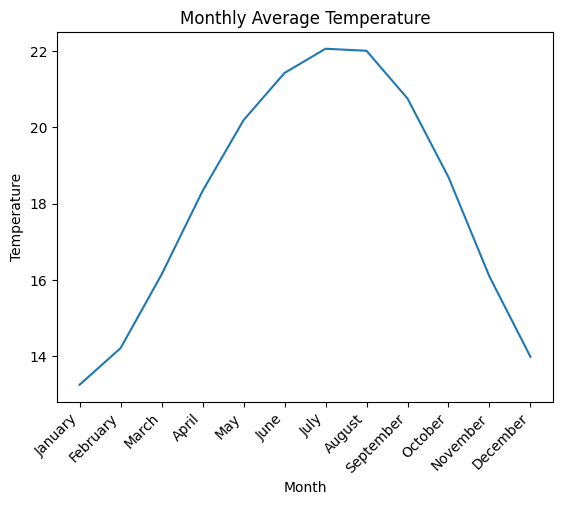

In [153]:
all_months = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]
monthly_avg_temp.index = pd.CategoricalIndex(monthly_avg_temp.index, categories=all_months, ordered=True)
monthly_avg_temp = monthly_avg_temp.sort_index()
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title("Monthly Average Temperature")
plt.xlabel("Month")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Temperature")
plt.show()

yorumla

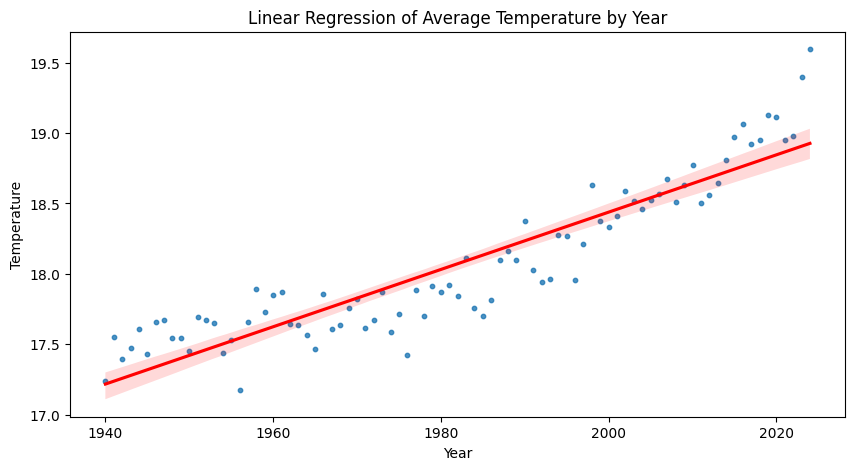

In [155]:
plt.figure(figsize=(10, 5))
sns.regplot(x=avg_temperature_by_year.index, y=avg_temperature_by_year.values, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Linear Regression of Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [ ]:
avg_temperature_by_year.values

In [160]:
country_trends = {}

for country in df["Entity"].unique():
    country_data = df[df["Entity"] == country].groupby("year")["temperature"].mean().dropna()
    if len(country_data) > 10:
        slope, intercept = np.polyfit(country_data.index, country_data.values, 1)
        country_trends[country] = slope

hottest_countries = sorted(country_trends.items(), key=lambda x: x[1], reverse=True)[:10]
print("Fastest Warming Countries:")
for country, trend in hottest_countries:
    print(f"{country}: {trend:.4f} °C/year")


Fastest Warming Countries:
Norway: 0.0447 °C/year
Saudi Arabia: 0.0394 °C/year
Algeria: 0.0358 °C/year
Tunisia: 0.0356 °C/year
Iceland: 0.0354 °C/year
Belarus: 0.0352 °C/year
Niger: 0.0340 °C/year
Yemen: 0.0339 °C/year
South Sudan: 0.0324 °C/year
Austria: 0.0324 °C/year


In [168]:
X = avg_temperature_by_year.index.values.reshape(-1, 1)

y = avg_temperature_by_year.values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [180]:
future_years = np.arange(1940, 2051).reshape(-1, 1)
future_temps = model.predict(future_years)

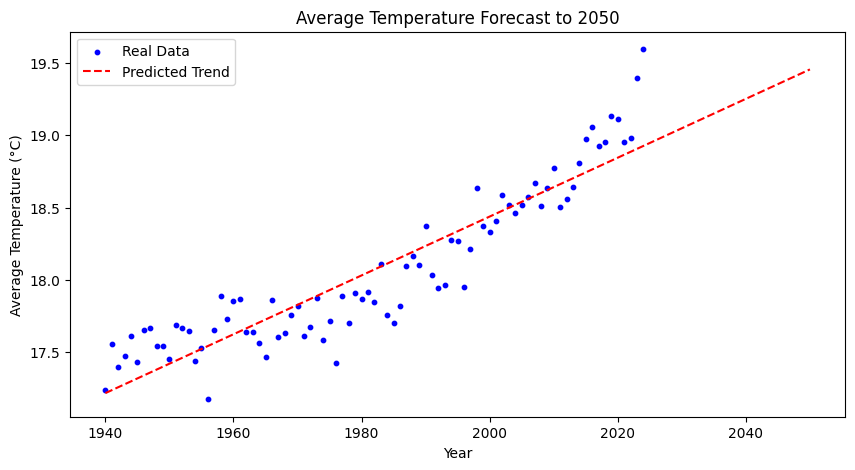

In [174]:
plt.figure(figsize=(10, 5))

plt.scatter(X, y, color="blue", label="Real Data", s=10)

plt.plot(future_years, future_temps, color="red", linestyle="dashed", label="Predicted Trend")

plt.title("Average Temperature Forecast to 2050")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()